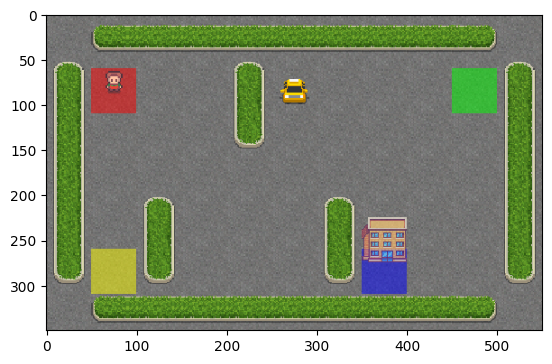

In [1]:
import gymnasium as gym
import matplotlib.pyplot as plt

env = gym.make("Taxi-v3", render_mode="rgb_array").env

env.reset()
plt.imshow(env.render())

In [2]:
env.reset() # reset environment to a new, random state
env.render()

print("Action Space {}".format(env.action_space))
print("State Space {}".format(env.observation_space))

Action Space Discrete(6)
State Space Discrete(500)


State: 328


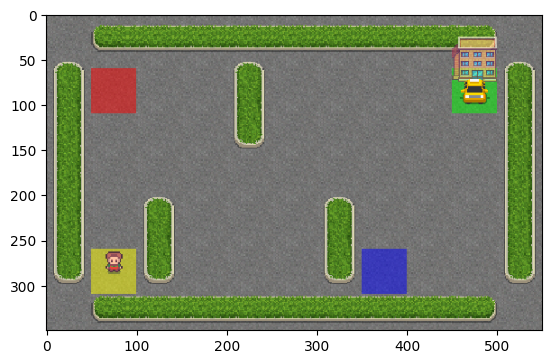

In [3]:
state = env.encode(3, 1, 2, 0) # (taxi row, taxi column, passenger index, destination index)
print("State:", state)

env.s = state
plt.imshow(env.render())

In [4]:
env.P[328]

#{action: [(probability, nextstate, reward, done)]}

{0: [(1.0, 428, -1, False)],
 1: [(1.0, 228, -1, False)],
 2: [(1.0, 348, -1, False)],
 3: [(1.0, 328, -1, False)],
 4: [(1.0, 328, -10, False)],
 5: [(1.0, 328, -10, False)]}

In [5]:
from IPython.display import clear_output

env.s = 328  # set environment to illustration's state

epochs = 0
penalties, reward = 0, 0

frames = [] # for animation

terminated = False

while not terminated:
    print(epochs)
    action = env.action_space.sample()
    state, reward, terminated, truncated, info = env.step(action)

    if reward == -10:
        penalties += 1
    
    # Put each rendered frame into dict for animation
    rendered_frame = env.render()
    
#     plt.imshow(rendered_frame)
    
    frames.append({
        'frame': rendered_frame,
        'state': state,
        'action': action,
        'reward': reward
        }
    )

    epochs += 1
    
    clear_output(wait=True)

env.close()
    
    
print("Timesteps taken: {}".format(epochs))
print("Penalties incurred: {}".format(penalties))

Timesteps taken: 1767
Penalties incurred: 565


Timestep: 431
State: 410
Action: 5
Reward: 20


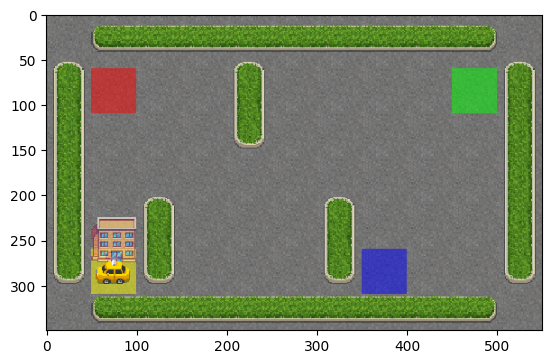

In [9]:
from IPython.display import clear_output
from time import sleep

# def print_frames(frames):
#     for i, frame in enumerate(frames):
#         clear_output(wait=True)
# #         print(frame['frame'].getvalue())
#         print(f"Timestep: {i + 1}")
#         print(f"State: {frame['state']}")
#         print(f"Action: {frame['action']}")
#         print(f"Reward: {frame['reward']}")
#         plt.imshow(frame['frame'])
#         sleep(.1)
# #         break
        
# print_frames(frames)

In [13]:
# import cv2

# video_name = 'withoutRF.avi'
# img_name = 'withoutRF/{}.png'

# w, h, c = frames[0]['frame'].shape

# video = cv2.VideoWriter(video_name, 0, 30, (w, h))

# for index, f in enumerate(frames):
#     current_frame = f['frame']
#     cv2.imwrite(img_name.format(index), current_frame)
#     video.write(cv2.imread(img_name.format(index)))

# cv2.destroyAllWindows() 
# video.release()

In [18]:
# cap = cv2.VideoCapture(video_name)

# if (cap.isOpened()== False):
#     print("Error opening video file")
    
# while(cap.isOpened()):
#     ret, frame = cap.read()
#     if ret == True:
#         cv2.imshow('Frame', frame)
#         cv2.waitKey(0)
#         if cv2.waitKey(25) & 0xFF == ord('q'):
#             break
#     else:
#         break
        
# # the video capture object
# cap.release()
 
# # Closes all the frames
# cv2.destroyAllWindows()

In [19]:
import numpy as np
q_table = np.zeros([env.observation_space.n, env.action_space.n])
q_table.shape

(500, 6)

In [26]:
#%%time
"""Training the agent"""

import random
from IPython.display import clear_output

# Hyperparameters
alpha = 0.1
gamma = 0.6
epsilon = 0.1

# For plotting metrics
all_epochs = []
all_penalties = []

#Frame
rf_frame = []

for i in range(1, 100001):
    state, _ = env.reset()

    epochs, penalties, reward, = 0, 0, 0
    terminated = False
    
    while not terminated:
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample() # Explore action space
        else:
            action = np.argmax(q_table[state]) # Exploit learned values

        next_state, reward, terminated, truncated, info = env.step(action) 
        
        rf_frame.append({
            'frame': env.render(),
            'state': state,
            'action': action,
            'reward': reward
        })
        
        old_value = q_table[state, action]
        next_max = np.max(q_table[next_state])
        
        new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
        q_table[state, action] = new_value

        if reward == -10:
            penalties += 1

        state = next_state
        epochs += 1
        
    if i % 100 == 0:
        clear_output(wait=True)
        print(f"Episode: {i}")

env.close()

print("Training finished.\n")

Episode: 100
348
166
51
414
267
263
483
188
394
344
289
107
27
294
471
1


MemoryError: Unable to allocate 564. KiB for an array with shape (550, 350, 3) and data type uint8

In [ ]:
q_table[328]